In [1]:
print('hellp')

hellp


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

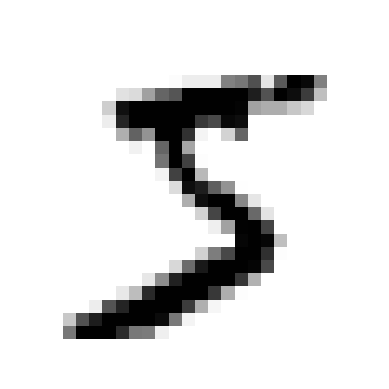

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')


In [7]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [8]:
# Scoring With Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [10]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [11]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))  # == 3530 / (687 + 3530))
print(recall_score(y_train_5, y_train_pred))  # == 3530 / (1891 + 3530))

0.8370879772350012
0.6511713705958311


Precision and Recall:

Precision: cost of false positive is high
Recall: cost of false negative is high

In [12]:
# Excercise 1

In [13]:
from sklearn.neighbors import KNeighborsClassifier


In [14]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = [{'weights':['uniform', 'distance'], 'n_neighbors':[3,4,5,6]}]

In [19]:
clf = GridSearchCV(model,parameters, cv=5)

In [20]:
clf.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [21]:
clf.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [22]:
clf.best_score_

0.9441999999999998

In [23]:
clf.best_estimator_.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [24]:
clf.score(X_test,y_test)

0.9714